Load dataframes with acf and calculate tau

In [1]:
import pandas as pd
import numpy as np
import sys
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Get the data

In [2]:
results_folder = 'D:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'
save_folder = 'D:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'

In [3]:
# get tau dfs
pfdl_tau_acf_average_trial_sttc_df = pd.read_pickle(results_folder + 'non_binned\\pfdl\\taus\\' 
                                                + 'tau_acf_average_trial_sttc_with_empty_50ms_20lags_ind1_df.pkl')

pfdl_tau_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfdl\\taus\\' 
                                                    + 'tau_acf_average_trial_pearsonr_with_empty_50ms_20lags_ind1_df.pkl')

pfdl_tau_df_proper_concat_isttc = pd.read_pickle(results_folder + '\\non_binned\\pfdl\\taus\\tau_acf_trial_isttc_concat_df_50ms_20lags_df.pkl')


In [16]:
pfdl_tau_df_merged = pfdl_tau_df_proper_concat_isttc.merge(pfdl_tau_acf_average_trial_pearsonr_df, on=['unit_id'], how='inner', 
                                           suffixes=('_concat', '_pearson'))

pfdl_tau_df_merged['diff'] = pfdl_tau_df_merged['r_squared_concat'] - pfdl_tau_df_merged['r_squared_pearson']

pfdl_tau_df_merged.dropna(inplace=True)
pfdl_tau_df_merged

,unit_id,fit_a_concat,fit_b_concat,fit_c_concat,tau_concat,r_squared_concat,tau_ms_concat,fit_a_pearson,fit_b_pearson,fit_c_pearson,tau_pearson,r_squared_pearson,tau_ms_pearson,diff
0,0,0.670149,0.068878,-5.243115e-01,14.518476,0.656957,725.923812,0.744816,0.049136,-0.372528,20.351867,0.915422,1017.593326,-0.258465
2,3,41.085427,4.862915,-4.247052e-04,0.205638,0.157546,10.281900,0.274949,0.165014,0.719756,6.060080,0.902492,303.004013,-0.744945
3,4,52567.974259,11.533455,-2.623053e-07,0.086704,0.466351,4.335214,0.188806,0.302429,0.085426,3.306560,0.675223,165.327993,-0.208872
4,5,14.224022,3.979966,3.167499e-03,0.251258,0.089611,12.562920,0.591472,0.111685,0.035089,8.953755,0.975709,447.687773,-0.886098
5,6,1.033994,1.188199,-1.556475e-02,0.841610,0.177196,42.080505,0.219952,0.076543,-0.128936,13.064618,0.451941,653.230898,-0.274745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,537,19.020560,3.970650,7.522163e-03,0.251848,0.136811,12.592398,0.357286,0.226011,0.162476,4.424570,0.935438,221.228523,-0.798627
502,539,401332.464789,13.552673,-4.953495e-08,0.073786,0.982051,3.689309,0.195242,0.116581,0.307397,8.577742,0.448709,428.887080,0.533342
503,540,481942.240291,13.749103,-2.207326e-08,0.072732,0.996810,3.636601,0.462560,0.431059,-0.060418,2.319868,0.885337,115.993379,0.111473
504,541,0.694074,0.131137,-1.524695e-01,7.625610,0.709585,381.280501,0.809961,0.464765,-0.022828,2.151623,0.936433,107.581158,-0.226848


#### Plots

In [5]:
fig_folder='E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'
save_fig=False

In [ ]:
pfdl_nan_df

In [ ]:
# percentage of nans in ACF and in tau - bar plots
fig, axes = plt.subplots(2,2, figsize=(6,6))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.barplot(ax=axes[0,0], x='metric', y='acf_nan_perc', data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)
sns.barplot(ax=axes[0,1], x='metric', y='tau_nan_perc', data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)

axes[0,0].set_title('PFDL area')
axes[0,1].set_title('PFDL area')
axes[0,0].set_ylabel('Failed ACF calculation (%)')
axes[0,1].set_ylabel('Failed ACF fits (%)')

sns.barplot(ax=axes[1,0], x='metric', y='acf_nan_perc', data=pfp_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)
sns.barplot(ax=axes[1,1], x='metric', y='tau_nan_perc', data=pfp_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)

axes[1,0].set_title('PFP area')
axes[1,1].set_title('PFP area')
axes[1,0].set_ylabel('Failed ACF calculation (%)')
axes[1,1].set_ylabel('Failed ACF fits (%)')

for ax in axes.flat:
    ax.set_xlabel('ACF metric')

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms.svg' , bbox_inches='tight')

In [ ]:
# percentage of nans in ACF and in tau - bar plots
fig, axes = plt.subplots(1,2, figsize=(6,2.5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_nan_perc', y='acf_nan_perc', hue='metric', s=70,
                data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'])

sns.scatterplot(ax=axes[1], x='tau_nan_perc', y='acf_nan_perc', hue='metric', s=70,
                data=pfp_nan_df, palette=['dimgray', 'darkgrey','steelblue'])

axes[0].set_title('PFdl area')
axes[1].set_title('PFp area')

for ax in axes.flat:     
    ax.set_ylabel('Failed ACF calculation (%)')
    ax.set_xlabel('Failed ACF fits (%)')
    ax.legend(frameon=False)
    ax.set_xlim([0,15])
    ax.set_ylim([-5,90])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms_scatter.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms_scatter.svg' , bbox_inches='tight')

In [ ]:
n_proper_better = len(proper_tau_concat_df.query(' r_squared > 0.8'))
n_proper_better_perc = n_proper_better / len(proper_tau_concat_df) * 100
print(n_proper_better_perc)

n_isttc_better = len(isttc_tau_concat_df.query(' r_squared > 0.8'))
n_isttc_better_perc = n_isttc_better / len(isttc_tau_concat_df) * 100
print(n_isttc_better_perc)

In [ ]:
n_proper_better2 = len(proper_tau_concat_df.query(' r_squared > 0.5'))
n_proper_better_perc2 = n_proper_better2 / len(proper_tau_concat_df) * 100
print(n_proper_better_perc2, n_proper_better2, len(tau_df_concat))

n_isttc_better2 = len(isttc_tau_concat_df.query(' r_squared > 0.5'))
n_isttc_better_perc2 = n_isttc_better2 / len(tau_df_concat) * 100
print(n_isttc_better_perc2, n_isttc_better2, len(isttc_tau_concat_df))

In [ ]:
r_squared_df = pd.DataFrame(np.vstack(([0.5, 0.5, 0.8, 0.8],
                                       [n_proper_better_perc, n_isttc_better_perc, n_proper_better_perc2, n_isttc_better_perc2], 
                                       ['ACF proper', 'iSTTC', 'ACF proper', 'iSTTC'])).T, 
                            columns=['r_squared', 'perc', 'metric'])
r_squared_df['perc'] = r_squared_df['perc'].astype(float)
r_squared_df['metric'] = r_squared_df['metric'].astype('category')
print(r_squared_df['metric'].unique())
r_squared_df

In [ ]:
r_squared_df.query('r_squared == "0.5"')

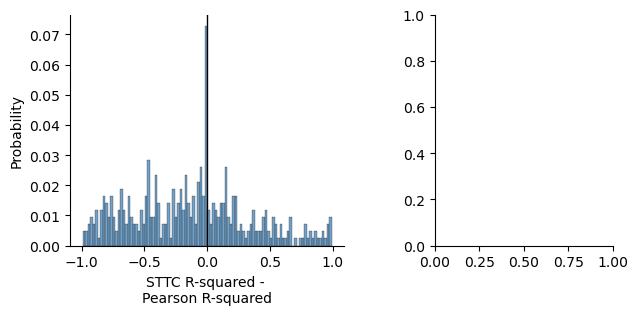

In [17]:
# r-squared of sttc and proper acf

n_sttc_better = len(pfdl_tau_df_merged.query('diff > 0'))
n_sttc_better_perc = pfdl_tau_df_merged / len(pfdl_tau_df_merged) * 100

fig, axes = plt.subplots(1,2, figsize=(7,3), gridspec_kw={'width_ratios': [2, 1.3]})
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=pfdl_tau_df_merged['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[0].axvline(x=0, lw=1, c='k')
axes[0].set_xlabel('STTC R-squared - \nPearson R-squared')
#axes[0].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)), y=1.1)

#sns.barplot(ax=axes[1], x='r_squared', y='perc', hue='metric', data=r_squared_df, palette=['darkgrey','steelblue'])

# axes[1].set_ylabel('Fits with with R-squared >= N (%)')
# axes[1].set_xlabel('R-squared >= N')
# axes[1].legend(frameon=False)

# axes[1].set_title('0.5: ' + str(n_proper_better) + ' vs ' + str(n_isttc_better) + ' trials,\n' + '0.8: ' 
#                   + str(n_proper_better2) + ' vs ' + str(n_isttc_better2) + ' trials,\n', y=1.05)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'sttc_vs_proper_trail_fit_0_1000_20_50ms.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'sttc_vs_proper_trail_fit_0_1000_20_50ms.svg' , bbox_inches='tight')